# T1.1: MNIST

## mnist_cnn.py


ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

In [72]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [73]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/50


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1539 - loss: 2.2758 - val_accuracy: 0.4824 - val_loss: 2.2112
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2791 - loss: 2.2041 - val_accuracy: 0.5763 - val_loss: 2.1147
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3834 - loss: 2.1113 - val_accuracy: 0.6303 - val_loss: 1.9886
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4610 - loss: 1.9927 - val_accuracy: 0.6712 - val_loss: 1.8280
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5241 - loss: 1.8378 - val_accuracy: 0.7115 - val_loss: 1.6329
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5651 - loss: 1.6670 - val_accuracy: 0.7450 - val_loss: 1.4231
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6075 - loss: 1.4862 - val_accuracy: 0.7791 - val_loss: 1.2242
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6346 - loss: 1.3306 - val_accuracy: 0.8030 - val_

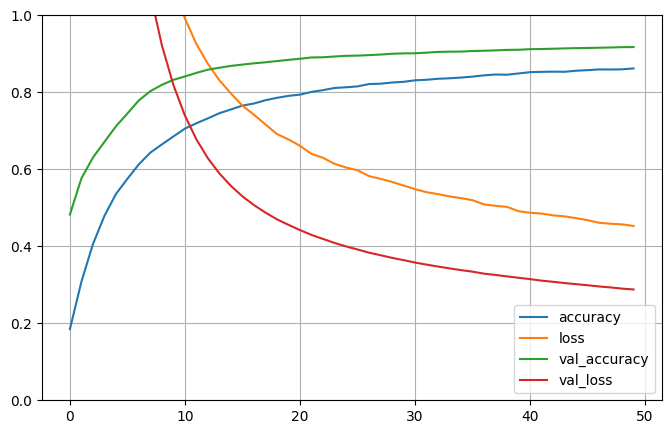

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## mnist_mlp.py


In [75]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [76]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_211 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8578 - loss: 0.4559 - val_accuracy: 0.9661 - val_loss: 0.1035
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1133 - val_accuracy: 0.9740 - val_loss: 0.0826
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9765 - loss: 0.0758 - val_accuracy: 0.9774 - val_loss: 0.0698
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9819 - loss: 0.0575 - val_accuracy: 0.9813 - val_loss: 0.0634
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9856 - loss: 0.0433 - val_accuracy: 0.9795 - val_loss: 0.0674
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9879 - loss: 0.0376 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9811 - val_loss: 0.0726
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.

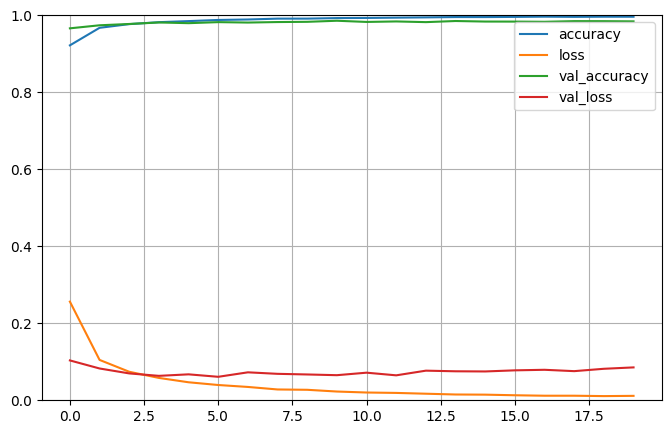

In [77]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [78]:
import os
from keras import regularizers
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser,
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

## (b) Convolutional Neural Network

In [79]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(64, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser,
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [80]:
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
# Epochs
bestEpochs = (50, 0)
#for epochs in [20, 25, 30, 35, 40, 45, 50]:
  #accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest, epochs=epochs)

  #if accuracy > bestEpochs[1]:
    #bestEpochs = (epochs, accuracy)

  #else:
    #break


# Optimiser
bestOptimiser = ("Adam", 0)
#for optimiser in ["SGD",
#                  "RMSprop",
#                  "Adam",
#                  "AdamW",
#                  "Adadelta",
#                  "Adagrad",
#                  "Adamax",
#                  "Adafactor",
#                  "Nadam",
#                  "Ftrl",
#                  "Lion"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          epochs=bestEpochs[0],
#                          optimiser=optimiser)

#  if accuracy > bestOptimiser[1]:
#    bestOptimiser = (optimiser, accuracy)


# Output activation function
bestOutActivation = ("softplus", 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if accuracy > bestOutActivation[1]:
#    bestOutActivation = (activation, accuracy)


# Hidden Layer activation function
bestHiddenActivation = ("tanh", 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if accuracy > bestHiddenActivation[1]:
#    bestHiddenActivation = (activation, accuracy)


# Hidden Layers
bestHidden = (1, 0)
#accuracyList = []
#for layers in range(1, 50):
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=layers,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])
  
#  accuracyList.append(accuracy)

#  if accuracy > bestHidden[1]:
#    bestHidden = (layers, accuracy)


# Regularisations
bestAlpha = (0, 0)
#alphas = np.logspace(-10, -2, 200)
#for alpha in alphas:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=bestHidden[0],
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0],
#                          alpha=alpha)

#  if accuracy > bestAlpha[1]:
#    bestAlpha = (alpha, accuracy)

print(f"Best Hidden layers: {bestHidden[0]}")
print(f"Best Optimiser: {bestOptimiser[0]}")
print(f"Best Output Activation: {bestOutActivation[0]}")
print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
print(f"Best Epochs: {bestEpochs[0]}")
print(f"Final Test accuracy: {bestHidden[1]}")

plt.figure()
plt.plot(accuracyList, range(len(accuracyList)))
plt.show()


Best Hidden layers: 1
Best Optimiser: Adam
Best Output Activation: softplus
Best Hidden Activation: tanh
Best Epochs: 50
Final Test accuracy: 0


NameError: name 'accuracyList' is not defined

<Figure size 640x480 with 0 Axes>

### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [ ]:
# CNN model eval
# Epochs
bestEpochs = (30, 0, 0)
#for epochs in [20, 25, 30, 35, 40, 45, 50]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest, epochs=epochs)

#  if val_acc > bestEpochs[2]:
#    bestEpochs = (epochs, test_acc, val_acc)

#  else:
#    break

# Optimiser
bestOptimiser = ("Adamax", 0, 0)
#for optimiser in ["SGD",
#                  "RMSprop",
#                  "Adam",
#                  "AdamW",
#                  "Adadelta",
#                  "Adagrad",
#                  "Adamax",
#                  "Adafactor",
#                  "Nadam",
#                  "Ftrl",
#                  "Lion"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          epochs=bestEpochs[0],
#                          optimiser=optimiser)

#  if val_acc > bestOptimiser[2]:
#    bestOptimiser = (optimiser, test_acc, val_acc)


# Output activation function
bestOutActivation = ("elu", 0, 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestOutActivation[2]:
#    bestOutActivation = (activation, test_acc, val_acc)


# Hidden Layer activation function
bestHiddenActivation = ("sigmoid", 0, 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestHiddenActivation[2]:
#    bestHiddenActivation = (activation, test_acc, val_acc)


# Hidden Layer activation function
bestConvActivation = ("relu", 0, 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          convActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestConvActivation[2]:
#    bestConvActivation = (activation, test_acc, val_acc)


# Hidden Layers
bestHidden = (2, 0, 0)
#for layers in range(1, 10):
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=layers,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          convActivation=bestConvActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestHidden[2]:
#    bestHidden = (layers, test_acc, val_acc)

#  else:
#    break


# Regularisations
bestAlpha = (0, 0, 0)
#alphas = np.logspace(-10, -2, 100)
#for alpha in alphas:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=bestHidden[0],
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          convActivation=bestConvActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0],
#                          alpha=alpha)

#  if val_acc > bestAlpha[2]:
#    bestAlpha = (alpha, test_acc, val_acc)

print(f"Best Hidden layers: {bestHidden[0]}")
print(f"Best Optimiser: {bestOptimiser[0]}")
print(f"Best Output Activation: {bestOutActivation[0]}")
print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
print(f"Best Convolutional Activation: {bestConvActivation[0]}")
print(f"Best Epochs: {bestEpochs[0]}")
print(f"Final Test accuracy: {bestHidden[1]}")

Best Hidden layers: 2
Best Optimiser: Adamax
Best Output Activation: elu
Best Hidden Activation: sigmoid
Best Convolutional Activation: relu
Best Epochs: 30
Final Test accuracy: 0


: 

: 

### CIFAR-10

In [ ]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

: 

: 

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2329 - loss: 2.0805 - val_accuracy: 0.4034 - val_loss: 1.6678
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4192 - loss: 1.6174 - val_accuracy: 0.4642 - val_loss: 1.4793
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4798 - loss: 1.4379 - val_accuracy: 0.5000 - val_loss: 1.4002
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5187 - loss: 1.3381 - val_accuracy: 0.5450 - val_loss: 1.2606
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5521 - loss: 1.2502 - val_accuracy: 0.5806 - val_loss: 1.1834
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5832 - loss: 1.1692 - val_accuracy: 0.6220 - val_loss: 1.0957
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6098 - loss: 1.0943 - val_accuracy: 0.6186 - val_loss: 1.0792
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6335 - loss: 1.0326 - 

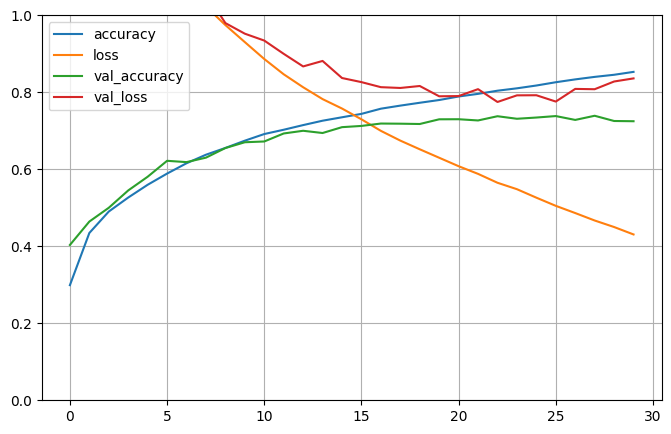

157/157 - 0s - 454us/step - accuracy: 0.7248 - loss: 0.8360
313/313 - 1s - 2ms/step - accuracy: 0.5291 - loss: 1.8939
Hidden layers: 2
Optimiser: adamax
Output Activation: elu
Hidden Activation: sigmoid
Conv Activation: relu
Alpha: 5
Epochs: 30
Validation loss: 0.8360478281974792
Validation accuracy: 0.7247999906539917
Test loss: 1.8938781023025513
Test accuracy: 0.5291000008583069
0.5291000008583069 0.7247999906539917


: 

: 

In [ ]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adamax",
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification
24 Classes

[ 0  0  0 ... 12 12 12]


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_280 (Conv2D)             │ (None, 73, 73, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_186               │ (None, 36, 36, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_281 (Conv2D)             │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_187               │ (None, 17, 17, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_282 (Conv2D)             │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_96 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 983,128 (3.75 MB)

 Trainable params: 983,128 (3.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0870 - loss: 2.6425 - val_accuracy: 0.0978 - val_loss: 2.5504
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0883 - loss: 2.5540 - val_accuracy: 0.0978 - val_loss: 2.5443
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0791 - loss: 2.5561 - val_accuracy: 0.0978 - val_loss: 2.5437
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0925 - loss: 2.5494 - val_accuracy: 0.1217 - val_loss: 2.4724
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1617 - loss: 2.3145 - val_accuracy: 0.2594 - val_loss: 1.9396
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2987 - loss: 1.7904 - val_accuracy: 0.3894 - val_loss: 1.5290
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4570 - loss: 1.3606 - val_accuracy: 0.5250 - val_loss: 1.1834
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5898 - loss: 1.0352 - val_accuracy: 0.6211 - val_

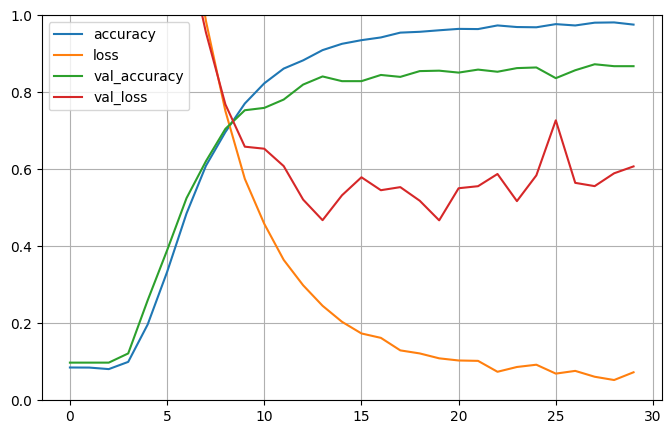

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2.26505884e-41 9.38594271e-32 2.60400269e-28 ... 0.00000000e+00
  2.80259693e-45 0.00000000e+00]
 [5.68099009e-40 1.51800801e-30 2.35629349e-35 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.17871637e-22 2.73657181e-15 1.52572138e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.07582315e-17 1.30549673e-14 4.83896647e-18 ... 9.39431191e-39
  2.00554076e-34 2.82988176e-36]
 [1.97598313e-27 1.03357704e-19 5.33549166e-23 ... 1.54142831e-44
  1.07867965e-36 0.00000000e+00]
 [1.41111881e-19 1.03935659e-24 4.34724155e-22 ... 5.60519386e-45
  1.19825032e-41 0.00000000e+00]]
57/57 - 0s - 775us/step - accuracy: 0.8678 - loss: 0.6075
57/57 - 0s - 726us/step - accuracy: 0.8728 - loss: 0.5193
Hidden layers: 2
Optimiser: adam
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 30
Validation loss: 0.6074532866477966
Validation accuracy: 0.8677777647972107
Test loss: 0.5193357467651367
Test accuracy: 0.87277

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])
print(ySmallClock)

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)


test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="softmax",
                          hiddenActivation="relu",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adam",
                          inputShape=(75, 75, 1),
                          outputShape=24)

print(test_acc, val_acc)

720 Classes

[  0   0   0 ... 719 719 719]


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_319 (Conv2D)             │ (None, 73, 73, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_212               │ (None, 36, 36, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_320 (Conv2D)             │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_213               │ (None, 17, 17, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_321 (Conv2D)             │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_109 (Flatten)           │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_267 (Dense)               │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_268 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_269 (Dense)               │ (None, 720)            │        46,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028,368 (3.92 MB)

 Trainable params: 1,028,368 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0011 - loss: 6.5798 - val_accuracy: 0.0000e+00 - val_loss: 6.5797
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 7.4865e-04 - loss: 6.5792 - val_accuracy: 5.5556e-04 - val_loss: 6.5801
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0014 - loss: 6.5792 - val_accuracy: 0.0000e+00 - val_loss: 6.5805
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 8.8284e-04 - loss: 6.5791 - val_accuracy: 0.0000e+00 - val_loss: 6.5809
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0015 - loss: 6.5790 - val_accuracy: 0.0000e+00 - val_loss: 6.5814
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0012 - loss: 6.5789 - val_accuracy: 0.0000e+00 - val_loss: 6.5819
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0015 - loss: 6.5787 - val_accuracy: 5.5556e-04 - val_loss: 6.5827
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accura

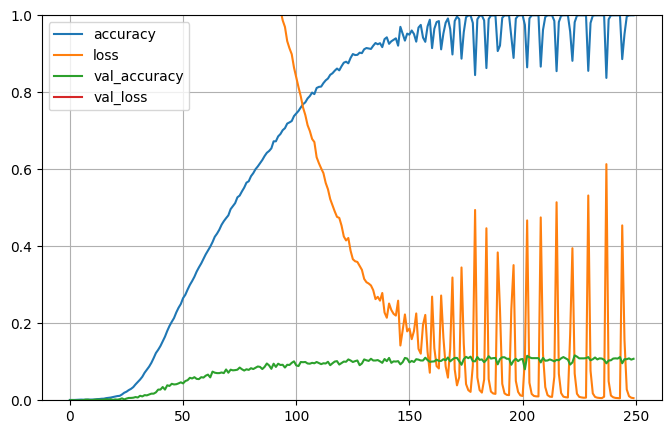

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[9.6426690e-26 9.4453478e-26 1.4012985e-45 ... 1.7182757e-34
  0.0000000e+00 1.2539800e-40]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.8064194e-33 3.4627072e-34 3.2271904e-42 ... 1.3602267e-28
  4.2036151e-41 1.7852542e-42]
 [2.2127961e-06 6.4435714e-11 5.5191290e-06 ... 6.1601979e-01
  3.4130732e-08 8.5899243e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
57/57 - 0s - 1ms/step - accuracy: 0.1078 - loss: 19.0128
57/57 - 0s - 811us/step - accuracy: 0.1233 - loss: 18.1986
Hidden layers: 2
Optimiser: <keras.src.optimizers.adam.Adam object at 0x7f7f51340800>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 250
Validation loss: 19.012840270996094
Validation accuracy: 0.10777777433395386
Test loss: 18.198570251464844
Tes

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])
print(ySmallClock)

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)


test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="softmax",
                          hiddenActivation="relu",
                          convActivation="relu",
                          epochs=250,
                          optimiser=keras.optimizers.Adam(learning_rate=0.0001),
                          inputShape=(75, 75, 1),
                          outputShape=720)

print(test_acc, val_acc)

## (b) Regression

In [104]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] // 60)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

print(xTrain, yTrain)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=250,
                          optimiser=keras.optimizers.Adamax(learning_rate=0.00001),
                          inputShape=(75, 75, 1),
                          outputShape=1)

print(test_acc, val_acc)

[[[[0.51764706]
   [0.57647059]
   [0.61960784]
   ...
   [0.55686275]
   [0.52941176]
   [0.55686275]]

  [[0.57254902]
   [0.56470588]
   [0.54509804]
   ...
   [0.53333333]
   [0.49803922]
   [0.45882353]]

  [[0.54509804]
   [0.54509804]
   [0.58431373]
   ...
   [0.59607843]
   [0.57254902]
   [0.52941176]]

  ...

  [[0.22745098]
   [0.19215686]
   [0.19215686]
   ...
   [0.44705882]
   [0.32156863]
   [0.39607843]]

  [[0.3372549 ]
   [0.41960784]
   [0.23921569]
   ...
   [0.48235294]
   [0.3372549 ]
   [0.42352941]]

  [[0.36862745]
   [0.44705882]
   [0.26666667]
   ...
   [0.45490196]
   [0.32941176]
   [0.45098039]]]


 [[[0.34509804]
   [0.36862745]
   [0.36470588]
   ...
   [0.4627451 ]
   [0.44313725]
   [0.45098039]]

  [[0.4       ]
   [0.34901961]
   [0.3372549 ]
   ...
   [0.49019608]
   [0.46666667]
   [0.52941176]]

  [[0.38039216]
   [0.45098039]
   [0.30980392]
   ...
   [0.4627451 ]
   [0.4745098 ]
   [0.42745098]]

  ...

  [[0.38823529]
   [0.29411765]
   [0.2

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_334 (Conv2D)             │ (None, 73, 73, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_222               │ (None, 36, 36, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_335 (Conv2D)             │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_223               │ (None, 17, 17, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_336 (Conv2D)             │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_114 (Flatten)           │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_282 (Dense)               │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_283 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_284 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 981,633 (3.74 MB)

 Trainable params: 981,633 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0819 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0847 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0842 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0833 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0808 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0813 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0840 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0823 - loss: nan - val_accuracy: 0.0828 - val_loss: nan
Epoch 9/250
450/

KeyboardInterrupt: 